# Assignment Information

- Assignment: Homework 2
- Author: Charles Hoyt
- Due: 2016 May 5, 10:30 am
- Language: R
- Posted: https://github.com/cthoyt/notebooks/blob/master/bit/abi/AbiHomework2.ipynb

In [1]:
version

               _                           
platform       x86_64-apple-darwin15.4.0   
arch           x86_64                      
os             darwin15.4.0                
system         x86_64, darwin15.4.0        
status                                     
major          3                           
minor          2.5                         
year           2016                        
month          04                          
day            14                          
svn rev        70478                       
language       R                           
version.string R version 3.2.5 (2016-04-14)
nickname       Very, Very Secure Dishes    

In [2]:
library('lattice')
library('gridExtra')

In [3]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


# Task 1

Continue investigating the iris data set, introduced in exercise series 1. 

## Task 1A

Generate boxplots visualizing the distribution of values for each of the variables sepal length, sepal width, petal length and petal height. The boxplots should be plotted separately for each of the 3 species classes. (4 points + 1 bonus)

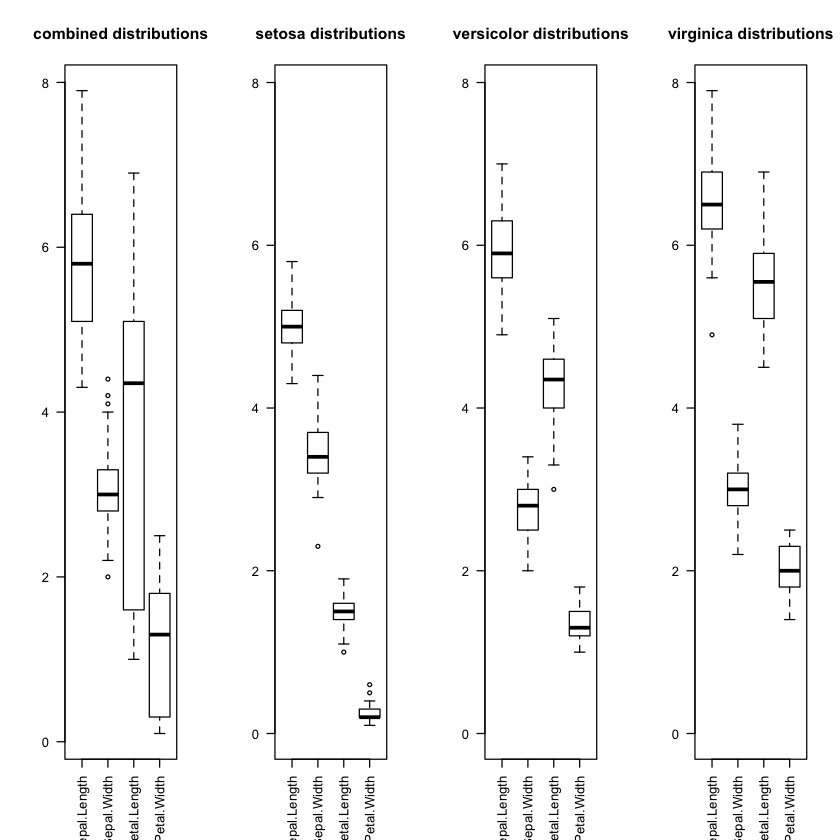

In [4]:
par(mfrow=c(1,4), las=2)

boxplot(iris[1:4], main="combined distributions")

species = unique(iris$Species)

for (i in 1:length(species)) {
    boxplot(iris[iris$Species == species[i], 1:4], 
            ylim=c(0, max(iris[1:4])),
            main=sprintf("%s distributions", species[i]))
}

## Task 1B

As a possible measure of distribution skewness (so-called non-parametric skew) one may consider the ratio S = mu - theta / sigma, where mu is the arithmetic mean, theta is the median and sigma the standard deviation.

Compute the distribution skewness for each of the variables sepal length, sepal width, petal length and petal height. Explain the results. (4 points + 1 bonus)

In [5]:
skews = vector(length=4)

for (i in 1:4) {
    ds = iris[, i]
    skews[i] = (mean(ds) - median(ds)) / sd(ds)
}

names(skews) = colnames(iris)[1:4]
skews

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
  0.05233076   0.13153881  -0.33535410  -0.13206729

### Explanation

The skew reflects the bias in the weighting of a distribution (mean) to one side of its median. A symmetric distribution has no skew, but it's also possible that an asymmetric distribution has equal weight on both sides of the mean/median and can also have no skew.

This measure is also normalized by the standard deviation to allow for comparisons of distributions that may have similar shape, but are on different scales. 

The results show that the mean of the petal length and width are both less than their respective medians, while the sepal length and width are both greater than their respective medians. 

## Task 1C

Calculate Pearson and Spearman rank correlations between each pair of variables, yielding a so-called correlation matrix. Do this once using the whole data and once using each of the 3 species classes separately. Which differences do you observe? What could be a possible explanation? (6 points + 1 bonus)

### Global Scores

In [6]:
corm = function(df, method='pearson') {
    n = length(df)
    cor_matrix = matrix(ncol=n, nrow=n)
    rownames(cor_matrix) = colnames(df)
    colnames(cor_matrix) = colnames(df)
    
    for (i in 1 : n) 
        for (j in 1: n) 
            cor_matrix[i, j] = cor(df[, i], df[, j], method=method)  

    return(cor_matrix)
}

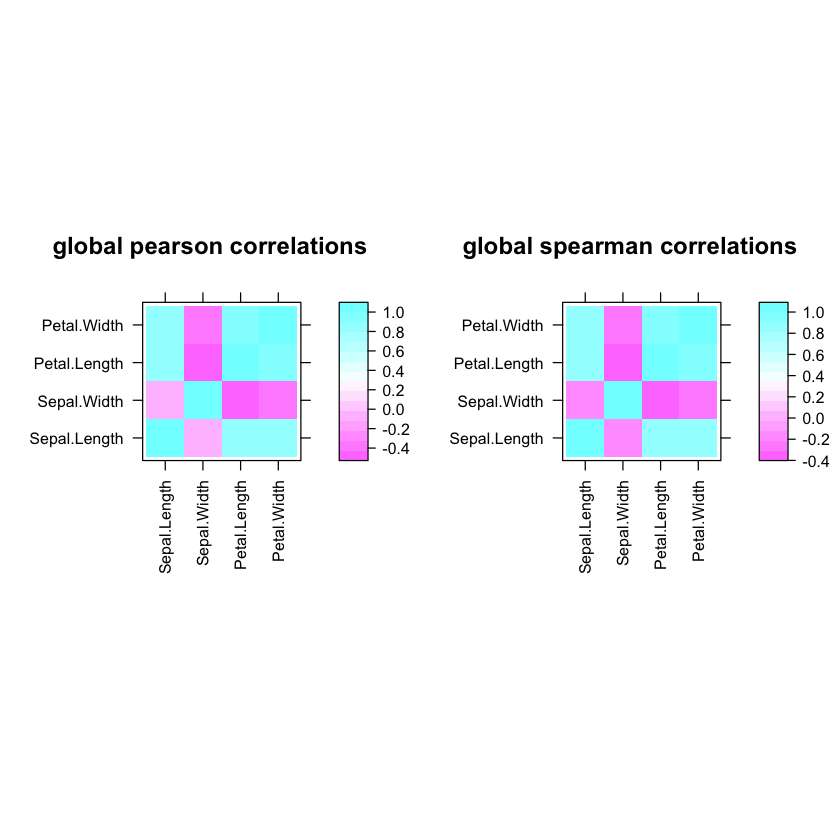

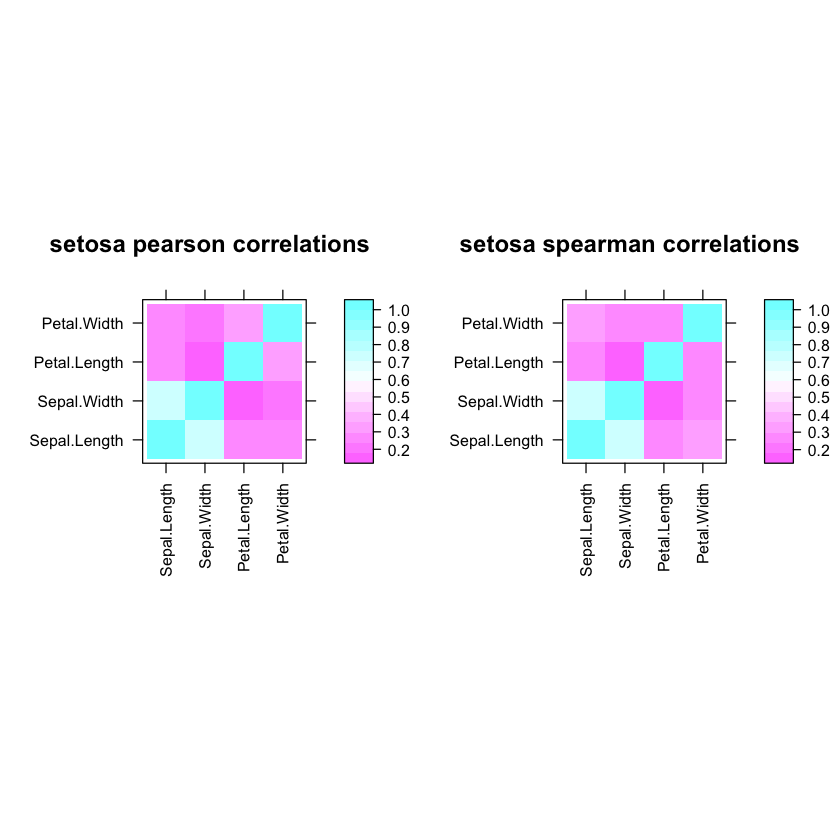

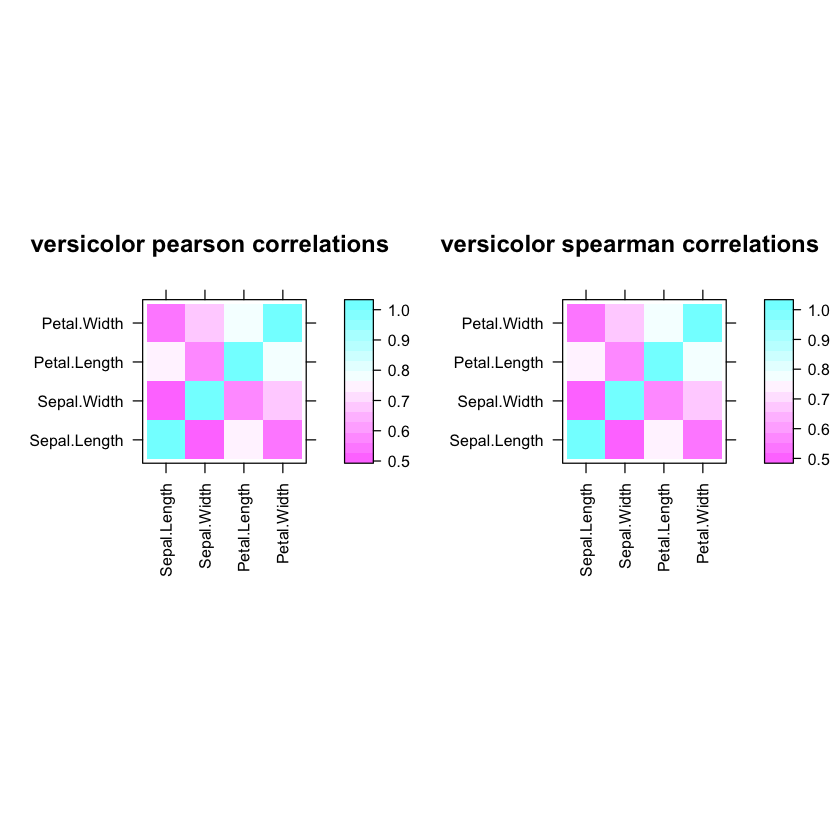

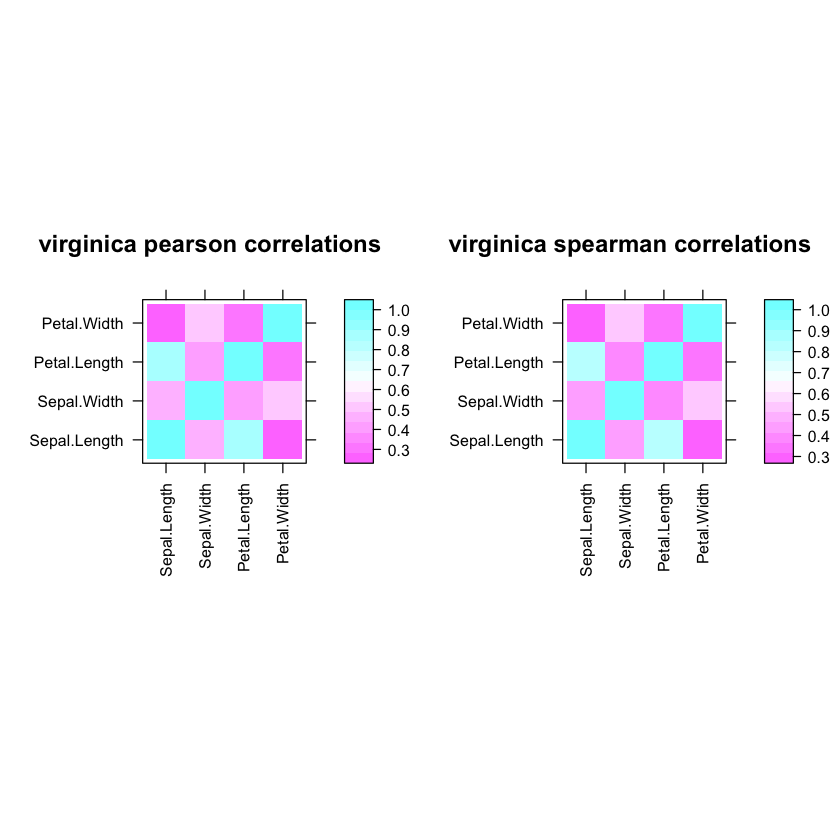

In [20]:
# see http://stackoverflow.com/questions/2540129/lattice-multiple-plots-in-one-window
# pdf("/Users/cthoyt/Dropbox/School/Bonn/ABI/homework2output.pdf")

a = corm(iris[1:4], 'pearson')
a = levelplot(a, main="global pearson correlations", xlab=NULL, ylab=NULL, scales=list(x=list(rot=90)))
e = corm(iris[1:4], 'spearman')
e = levelplot(e, main="global spearman correlations", xlab=NULL, ylab=NULL, scales=list(x=list(rot=90)))
grid.arrange(a, e, ncol=2)

b = corm(iris[iris$Species == species[1], 1:4], 'pearson')
b = levelplot(b, main="setosa pearson correlations", xlab=NULL, ylab=NULL, scales=list(x=list(rot=90)))
f = corm(iris[iris$Species == species[1], 1:4], 'spearman')
f = levelplot(f, main="setosa spearman correlations", xlab=NULL, ylab=NULL, scales=list(x=list(rot=90)))
grid.arrange(b, f, ncol=2)

c = corm(iris[iris$Species == species[2], 1:4], 'pearson')
c = levelplot(c, main="versicolor pearson correlations", xlab=NULL, ylab=NULL, scales=list(x=list(rot=90)))
g = corm(iris[iris$Species == species[2], 1:4], 'spearman')
g = levelplot(g, main="versicolor spearman correlations", xlab=NULL, ylab=NULL, scales=list(x=list(rot=90)))
grid.arrange(c, g, ncol=2)

d = corm(iris[iris$Species == species[3], 1:4], 'pearson')
d = levelplot(d, main="virginica pearson correlations", xlab=NULL, ylab=NULL, scales=list(x=list(rot=90)))
h = corm(iris[iris$Species == species[3], 1:4], 'spearman')
h = levelplot(h, main="virginica spearman correlations", xlab=NULL, ylab=NULL, scales=list(x=list(rot=90)))
grid.arrange(d, h, ncol=2)

### Explanation

For both the global and flower-specific data sets, the pearson correlation and spearman correlation matched very well for all pairwise correlations between the four variables. However, the patterns of correlation were widely different for each the global and all flower-specific data sets.

# Task 2

Consider the following four datasets. (available for download as exercise2-2.csv):

In [8]:
task = read.table("/Users/cthoyt/Dropbox/School/Bonn/ABI/exercise2-2.csv", sep=',', header=TRUE)
task

,x1,y1,x2,y2,x3,y3,x4,y4
1,10,8.04,10,9.14,10,7.46,8,6.58
2,8,6.95,8,8.14,8,6.77,8,5.76
3,13,7.58,13,8.74,13,12.74,8,7.71
4,9,8.81,9,8.77,9,7.11,8,8.84
5,11,8.33,11,9.26,11,7.81,8,8.47
6,14,9.96,14,8.1,14,8.84,8,7.04
7,6,7.24,6,6.13,6,6.08,8,5.25
8,4,4.26,4,3.1,4,5.39,19,12.5
9,12,10.84,12,9.13,12,8.15,8,5.56
10,7,4.82,7,7.26,7,6.42,8,7.91


## Task 2A

For each dataset:

1. Calculate the mean and variance for x and y
2. Calculate the correlation between x and y
3. Linear regression: The linear regression line is a linear function that ‘explains’ the dependent variable in terms of by a linear function ( ) that fits the real data values as good as possible, i.e. it looks for a line so that the ( ) are a “good” approximation for the given data values . (Linear regression will be covered in the lecture in more detail at a later stage). It is given by the formula ( ) , where and ̅ ̅. Here, is the Pearson correlation between and . and are the square roots of the variances of and . Determine and (3 points + 1 bonus) for each data set.

### Means

In [9]:
means = apply(task, 2, mean)
names(means) = colnames(task)
means

x1       y1       x2       y2       x3       y3       x4       y4 
9.000000 7.500909 9.000000 7.500909 9.000000 7.500000 9.000000 7.500909

### Variances

In [10]:
vars = apply(task, 2, var)
names(vars) = colnames(task)
vars

x1        y1        x2        y2        x3        y3        x4        y4 
11.000000  4.127269 11.000000  4.127629 11.000000  4.122620 11.000000  4.123249

### Correlations

Calculate the correlation between and x and y

In [11]:
cors = c(cor(task['x1'], task['y1']), 
         cor(task['x2'], task['y2']), 
         cor(task['x3'], task['y3']), 
         cor(task['x4'], task['y4']))
names(cors) = c('d1', 'd2', 'd3', 'd4')
cors

d1        d2        d3        d4 
0.8164205 0.8162365 0.8162867 0.8165214

### Linear Regressions

Linear regression: The linear regression line is a linear function that ‘explains’ the dependent variable in terms of by a linear function ( ) that fits the real data values as good as possible, i.e. it looks for a line so that the ( ) are a “good” approximation for the given data values . (Linear regression will be covered in the lecture in more detail at a later stage). It is given by the formula
( ) , where and ̅ ̅. Here, is the Pearson correlation between and . and are the square roots of the variances of
 and . Determine and (3 points + 1 bonus)
for each data set.

In [12]:
intercepts = matrix(0, ncol=2, nrow=4)
colnames(intercepts) = c('a', 'b')
rownames(intercepts) = names(cors)

for (i in 1:4) {
    x_idx = 2 * i - 1
    y_idx = 2 * i
    b = cors[i] * sqrt(vars[x_idx]) / sqrt(vars[y_idx])
    intercepts[i, 2] = b
    intercepts[i, 1] = means[y_idx] - (b * means[x_idx])
}

intercepts

,a,b
d1,-4.494674,1.332843
d2,-4.491448,1.332484
d3,-4.500378,1.333375
d4,-4.502004,1.333657


## Task 2B

i. Now might be a good idea to look at the data: For each data set plot the data in a scatter plot and add the regression line to the scatter plot.

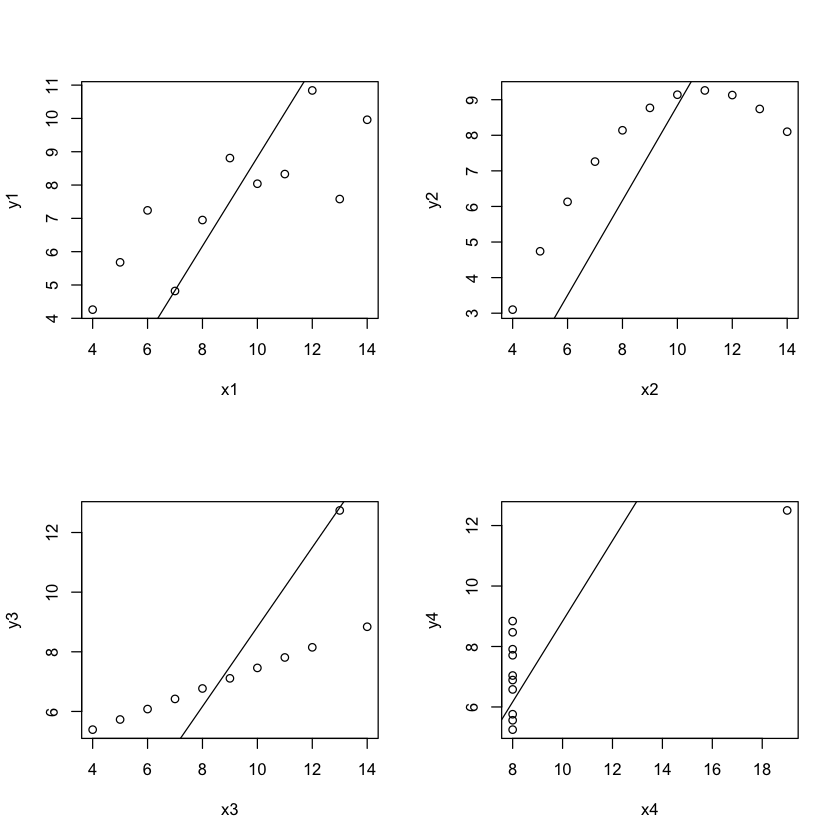

In [18]:
par(mfrow=c(2,2))

for (i in 1:4) {
    plot(task[(2*i-1):(2*i)])
    #abline(lm(task[((2*i):2*i-1)]))
    abline(intercepts[i, 1], intercepts[i, 2])
}

ii. In which cases does the linear regression line give a good fit to the data? On the basis of the scatter plots, describe the relationship/dependence between
and for each data set.

### Explanation

1. Data Set 1 has a decent linear relationship between x and y.
2. Data Set 2 more resembles a quadratic relationship between x and y. A linear model is not appropriate.
3. Data Set 3 has a linear relationship, but is hugely affected by an outlier point.
4. Data Set 4 appears to have a constant relationship. A linear model is not appropriate, but the outlier causes an unexpected/nonsense linear regression.